In [14]:
import os
import re
def extract(file_path):
    
    n_qubits=0
    cpu_mem =0
    gpu_mem = 0
    time=0
    
    
    
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract other information
    qubits_pattern = re.compile(r'number of qubits =\s+(\d+)', re.IGNORECASE)
    qubits_match = re.search(qubits_pattern, content)
    if qubits_match:
        num_qubits = int(qubits_match.group(1))
        n_qubits = num_qubits
        # print("Number of qubits:", num_qubits)

    layers_pattern = re.compile(r'number of layers =\s+(\d+)', re.IGNORECASE)
    layers_match = re.search(layers_pattern, content)
    if layers_match:
        num_layers = int(layers_match.group(1))
        # print("Number of layers:", num_layers)


    time_pattern = re.compile(r'time consumed: ([0-9.]+)s', re.IGNORECASE)
    time_match = re.search(time_pattern, content)
    if time_match:
        time_consumed = float(time_match.group(1))
        time = float(time_consumed)
        # time=round(time_consumed, 3)
        # print("Time consumed:", time_consumed, "s")

    cpu_memory_pattern = re.compile(r'CPU Memory usage : \((\d+), (\d+)\)', re.IGNORECASE)
    cpu_memory_match = re.search(cpu_memory_pattern, content)
    if cpu_memory_match:
        cpu_memory_usage = (int(cpu_memory_match.group(1)), int(cpu_memory_match.group(2)))
        # print(cpu_memory_usage[1]/1000000)
        # print("CPU Memory usage:", cpu_memory_usage)
        # cpu_mem=float(cpu_memory_usage[1]/(2**20))
        cpu_mem=round(cpu_memory_usage[1] / (2 ** 20), 2)
        # cpu_mem=float(cpu_memory_usage[1]/(10**6))

    gpu_memory_pattern = re.compile(r'GPU memory usage: (\d+) MiB', re.IGNORECASE)
    gpu_memory_match = re.search(gpu_memory_pattern, content)
    if gpu_memory_match:
        gpu_memory_usage = int(gpu_memory_match.group(1))
        gpu_mem = gpu_memory_usage
        # print("GPU Memory usage:", gpu_memory_usage, "MiB")
    
    return n_qubits,time,cpu_mem,gpu_mem,cpu_mem+gpu_mem


In [15]:
data = {i:[0,0] for i in range(4,17)}

y_runtime_pennylane = []
y_memory_pennylane_cpu = []

device = 'default.qubit'

# Specify the folder path
folder_path = '../pennylane/VQS_pennylane/'+device

# List all files in the folder
files = os.listdir(folder_path)

# Run the extract function on each file
for file in files:
    file_path = os.path.join(folder_path, file)
    # print(file_path)
    info=extract(file_path)
    if(info[0]!=0):
        # print(info)
        # data[info[0]]=[info[1],str(info[2])+'+'+str(info[3])]
        data[info[0]]=[info[1],info[2]]
        
print(data)
import pandas as pd
sorted_data = dict(sorted(data.items()))
df = pd.DataFrame.from_dict(sorted_data, orient='index', columns=['Runtime(Seconds)', 'Memory(MiB)'])
df.index.name = 'Key'

filename = device+'.xlsx'
df.to_excel(filename)
print(f"Data saved to {filename}")

{4: [0.144595, 5.39], 5: [0.144742, 5.39], 6: [0.144054, 5.39], 7: [0.148975, 5.4], 8: [0.153439, 5.41], 9: [0.157861, 5.42], 10: [0.165691, 5.45], 11: [0.173967, 5.5], 12: [0.190426, 5.61], 13: [0.238463, 5.83], 14: [0.303668, 6.27], 15: [0.397625, 8.56], 16: [0.615166, 15.57], 28: [2477.758884, 57345.64], 29: [4912.132739, 114689.66], 23: [76.547803, 1793.58], 26: [606.584883, 14337.62], 27: [1214.947074, 28673.63], 18: [2.040409, 57.57], 22: [40.984062, 897.58], 24: [153.761002, 3585.59], 21: [16.812326, 449.57], 19: [4.173768, 113.59], 17: [1.044743, 29.57], 25: [302.069521, 7169.6], 20: [9.356254, 225.59]}
Data saved to default.qubit.xlsx


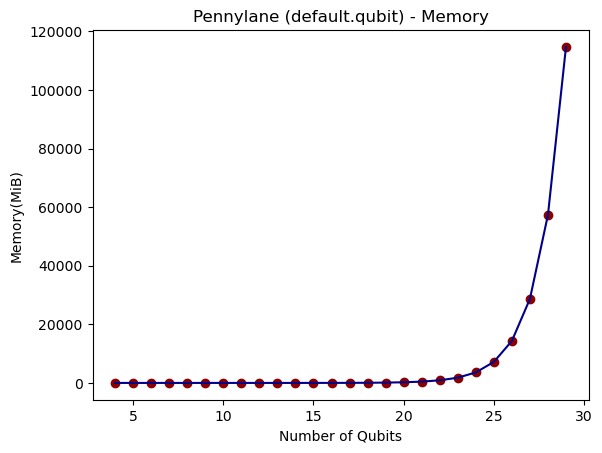

In [16]:
import matplotlib.pyplot as plt


# Extract x and y values from dict1
x1 = list(data.keys())
x1.sort()
y1 = [data[x][1] for x in x1]

# Plot the data points
# plt.plot(x1, y1, label='Pennylane(default.qubit)',color='darkblue')
plt.plot(x1, y1,color='darkblue')

# Add data points for dict1
plt.scatter(x1, y1, color='darkred')


# Add labels and title
plt.xlabel('Number of Qubits')
# plt.ylabel('Runtime(s)')
plt.ylabel('Memory(MiB)')
plt.title('Pennylane (default.qubit) - Memory')

# Show the plot
plt.show()
